In [16]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [17]:
df = pd.read_csv("../Datasets/amazon_reviews_unlabelled.csv")

In [18]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'UNNAMED: 0', 'REVIEW_TITLE', 'RATINGS',
       'REVIEW', 'VERIFIED', 'USER_NAME', 'USER_ID', 'MAX_REVIEWS_DAY',
       'HELPFUL_VOTES', 'PRODUCT', 'REVIEW_SENTIMENT', 'AVERAGE_RATING',
       'RATING_DEVIATION', 'REVIEW_LENGTH', 'TITLE_LENGTH',
       'TOTAL_USER_REVIEWS', 'DATETIME', 'REVIEW_DATE_DIFF', 'DATE',
       'AVG_WORD_LENGTH', 'TOTAL_PRODUCT_REVIEWS', 'NUM_NOUNS', 'NUM_VERBS',
       'NUM_ADJECTIVES', 'NUM_ADVERBS', 'READABILITY_FRE',
       'CAPITAL_CHAR_COUNT', 'PUNCTUATION_COUNT', 'REVIEW_WORD_COUNT',
       'SENTIMENT_SCORE_TITLE', 'NUM_NAMED_ENTITIES', 'LEXICAL_DIVERSITY',
       'WORD_COUNT', 'RATING_CATEGORY', 'SENTIMENT_CATEGORY', 'COHERENCE',
       'TOKENIZED_REVIEW', 'NGRAMS', 'TOTAL_VERIFIED_REVIEWS',
       'TOTAL_USER_HELPFUL_VOTES', 'PREPROC_REVIEW_TEXT'],
      dtype='object')

In [19]:
df.dropna(inplace=True)

In [20]:
df.to_csv("../Datasets/amazon_reviews_unlabelled.csv")

In [21]:
features = [
    'RATINGS',
        'VERIFIED', 'MAX_REVIEWS_DAY',
       'HELPFUL_VOTES', 'REVIEW_SENTIMENT', 'AVERAGE_RATING',
       'RATING_DEVIATION', 'REVIEW_LENGTH', 'TITLE_LENGTH',
       'TOTAL_USER_REVIEWS', 'REVIEW_DATE_DIFF', 
       'AVG_WORD_LENGTH', 'TOTAL_PRODUCT_REVIEWS', 'READABILITY_FRE',
       'CAPITAL_CHAR_COUNT', 'PUNCTUATION_COUNT', 'REVIEW_WORD_COUNT',
       'SENTIMENT_SCORE_TITLE', 'NUM_NAMED_ENTITIES', 'LEXICAL_DIVERSITY',
       'WORD_COUNT', 'RATING_CATEGORY', 'SENTIMENT_CATEGORY', 'COHERENCE',
        'TOTAL_VERIFIED_REVIEWS',
       'TOTAL_USER_HELPFUL_VOTES'
    
]

In [22]:
len(features)

26

In [23]:
X = df[features]

In [24]:
#MINMAX SCALING
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [25]:
#INITIALISE THE SOM
som = MiniSom(
    x=20, y=20, #DIMENSION OF GRID
    input_len = 26, #NUMBER OF FEATURES IN X
    sigma = 1.0, #RADIUS OF NEIGHBORHOOD
    learning_rate = 0.5, #WEIGHT UPDATION 
)

In [26]:
#INITIALISE THE WEIGHTS OF SOM [COORDINATES OF OUTPUT NODES]
som.random_weights_init(X) #DATA FOR TRAINING
som.train_random(
    data = X, #TRAINING DATA
    num_iteration = 200
)

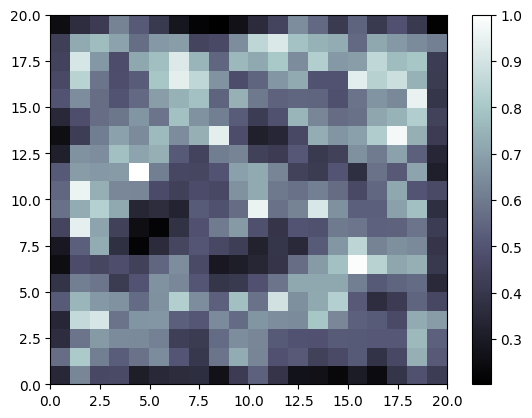

In [27]:
#VISUALISE THE RESULTS: PLOT THE SOM: COLOR BASED ON MID
from pylab import bone, pcolor, colorbar, plot, show

#INITIALISE FIGURE
bone()

#ADD INFORMATION ON MID: COLORS FOR RANGES
pcolor(som.distance_map().T) #TRANSPOSE OF MID

#ADD A LEGEND
colorbar() #NORMALISED MID VALUES


show()